## Tienda en linea
A cargo de : Camilo Salinas, Lorena Hernández, Camila Galvis

*En el presente documento se tiene como inmsumo el dataset encontrado en https://archive.ics.uci.edu/ml/datasets/Online+Retail+II que contiene los datos de las ventas en linea de una tienda de regalos de reino unido.*
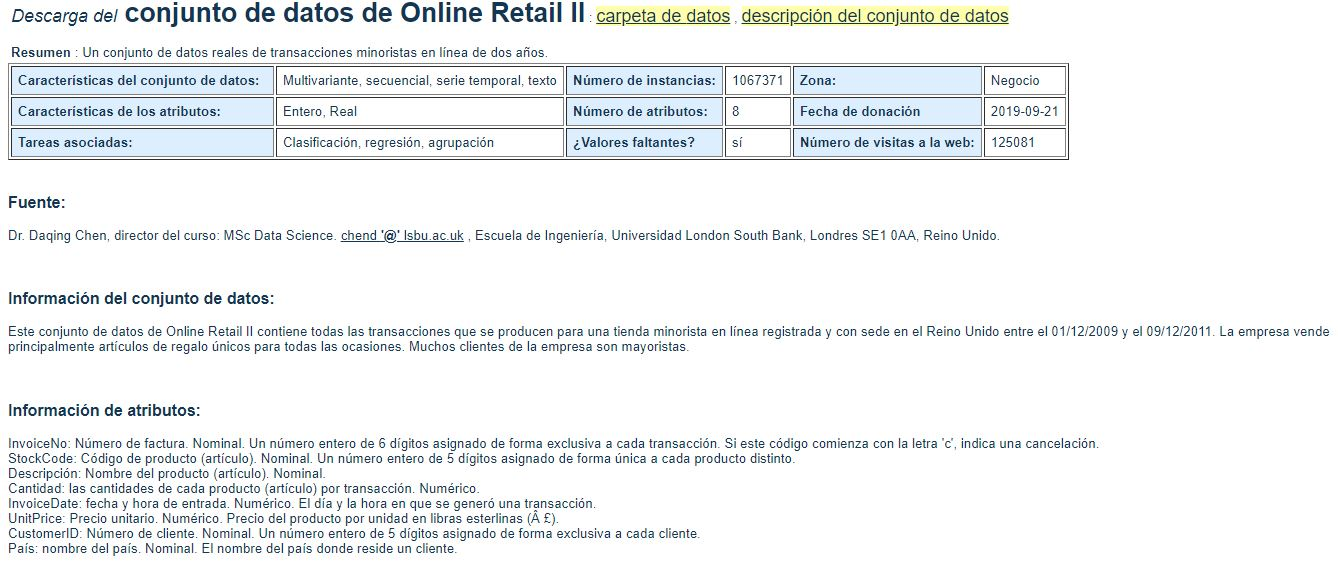


*El principal objetivo es aplicar un  analisis cluster o de agrupamiento que se encuentra contenido en un problema de aprendizaje no supervizado.*

*se plantea este tipo de analisis con el fin de identificar y encontrar diferentes grupos de clientes, tales como pueden ser los mayoristas, los minoristas, los clientes frecuentes y los clientes esporádicos, con el fin de brindar beneficios a los clientes (descuentos, bonos de regalo, obsequios entre otros)*



In [18]:
! pip install altair vega_datasets

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data

In [20]:
import pandas as pd
archivo ='/content/online_retail_II.xlsx'
df = pd.read_excel(archivo, sheet_name='Year 2009-2010')

In [21]:
df2 = pd.read_excel(archivo, sheet_name='Year 2010-2011')

In [22]:
df

Invoice StockCode  ... Customer ID         Country
0       489434     85048  ...     13085.0  United Kingdom
1       489434    79323P  ...     13085.0  United Kingdom
2       489434    79323W  ...     13085.0  United Kingdom
3       489434     22041  ...     13085.0  United Kingdom
4       489434     21232  ...     13085.0  United Kingdom
...        ...       ...  ...         ...             ...
525456  538171     22271  ...     17530.0  United Kingdom
525457  538171     22750  ...     17530.0  United Kingdom
525458  538171     22751  ...     17530.0  United Kingdom
525459  538171     20970  ...     17530.0  United Kingdom
525460  538171     21931  ...     17530.0  United Kingdom

[525461 rows x 8 columns]

In [23]:
values1 = df[["StockCode", "Description","Quantity","Price","Customer ID","Country"]]
values2 = df2[["StockCode", "Description","Quantity","Price","Customer ID","Country"]]

In [24]:
dataframes = [values1,values2]
dataframes

[       StockCode  ...         Country
 0          85048  ...  United Kingdom
 1         79323P  ...  United Kingdom
 2         79323W  ...  United Kingdom
 3          22041  ...  United Kingdom
 4          21232  ...  United Kingdom
 ...          ...  ...             ...
 525456     22271  ...  United Kingdom
 525457     22750  ...  United Kingdom
 525458     22751  ...  United Kingdom
 525459     20970  ...  United Kingdom
 525460     21931  ...  United Kingdom
 
 [525461 rows x 6 columns],        StockCode  ...         Country
 0         85123A  ...  United Kingdom
 1          71053  ...  United Kingdom
 2         84406B  ...  United Kingdom
 3         84029G  ...  United Kingdom
 4         84029E  ...  United Kingdom
 ...          ...  ...             ...
 541905     22899  ...          France
 541906     23254  ...          France
 541907     23255  ...          France
 541908     22138  ...          France
 541909      POST  ...          France
 
 [541910 rows x 6 columns]]

In [25]:
BaseF = pd.concat(dataframes)
BaseF

StockCode  ...         Country
0          85048  ...  United Kingdom
1         79323P  ...  United Kingdom
2         79323W  ...  United Kingdom
3          22041  ...  United Kingdom
4          21232  ...  United Kingdom
...          ...  ...             ...
541905     22899  ...          France
541906     23254  ...          France
541907     23255  ...          France
541908     22138  ...          France
541909      POST  ...          France

[1067371 rows x 6 columns]

**Datos Faltantes**


In [26]:
valores_faltantes = BaseF.isnull().sum()
valores_faltantes

StockCode           0
Description      4382
Quantity            0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [27]:
BaseF.dropna(axis = 0)

StockCode  ...         Country
0          85048  ...  United Kingdom
1         79323P  ...  United Kingdom
2         79323W  ...  United Kingdom
3          22041  ...  United Kingdom
4          21232  ...  United Kingdom
...          ...  ...             ...
541905     22899  ...          France
541906     23254  ...          France
541907     23255  ...          France
541908     22138  ...          France
541909      POST  ...          France

[824364 rows x 6 columns]

## En cuanto a la base de datos y las variables
La base de datos contiene información acerca de las ventas nacionales e internacionales de una tienda en línea que ofrece productos de regalo para toda ocasión y que tiene registrada su sede en el Reino Unido. Los registros de las ventas están entre el primero de diciembre de 2009 hasta el 12 de diciembre del 2011.
La base de datos cuenta con un total de un millón sesenta y siete mil trescientos setenta y un datos pero luego de hacer limpieza del dataset tenemos un total de ochocientos cincuenta y tres mil trescientos cuarenta y cinco con ocho variables:

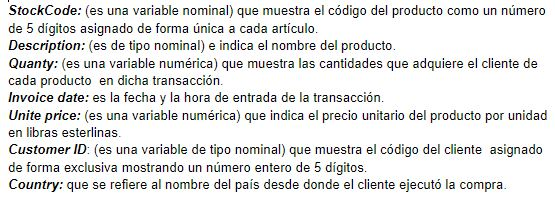


In [28]:
BASE = BaseF[BaseF.Price >= 1 ]
BASE

StockCode  ...         Country
0          85048  ...  United Kingdom
1         79323P  ...  United Kingdom
2         79323W  ...  United Kingdom
3          22041  ...  United Kingdom
4          21232  ...  United Kingdom
...          ...  ...             ...
541905     22899  ...          France
541906     23254  ...          France
541907     23255  ...          France
541908     22138  ...          France
541909      POST  ...          France

[853345 rows x 6 columns]

**Gráfico de Barras**

In [29]:
! pip install altair vega_datasets

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data

Productos Más vendidos 

In [31]:
Producto = pd.DataFrame(BASE['StockCode'].value_counts());Producto

StockCode
85123A       5821
22423        4408
85099B       4210
20725        3259
84879        2956
...           ...
79303A          1
23609           1
90092           1
85159b          1
46776a          1

[4536 rows x 1 columns]

In [32]:
pd.DataFrame(BASE['Description'].value_counts())

Description
WHITE HANGING HEART T-LIGHT HOLDER          5913
REGENCY CAKESTAND 3 TIER                    4408
JUMBO BAG RED RETROSPOT                     3465
ASSORTED COLOUR BIRD ORNAMENT               2956
PARTY BUNTING                               2763
...                                          ...
Dotcomgiftshop Gift Voucher £100.00            1
DOORMAT GREEN PAISLEY                          1
BLUE OWL DECORATION                            1
ENAMEL MUG PANTRY                              1
HANDZ-OFF CAR FRESHENER                        1

[4948 rows x 1 columns]

In [33]:
PF = Producto[:5];PF

StockCode
85123A       5821
22423        4408
85099B       4210
20725        3259
84879        2956

In [34]:
data_1 = {'Producto' : ['85123A', '22423', '85099B', '20725', '84879'],
          'Cantidad' : [5821, 4408, 4210, 3259, 2956]}
df_1 = pd.DataFrame(data_1)
df_1

Producto  Cantidad
0   85123A      5821
1    22423      4408
2   85099B      4210
3    20725      3259
4    84879      2956

In [35]:
?sns.barplot

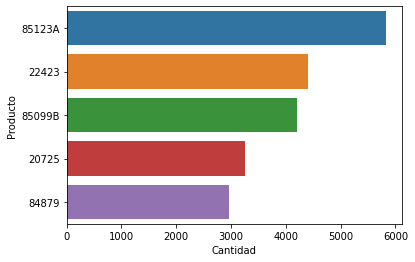

In [36]:
sns.barplot(data = df_1, x = "Cantidad", 
            y = "Producto")

*En esta visualización se exponen los 5 productos más vendidos de la tienda con sus respectivas cantidades, estos productos son un soporte de luz colgante con 5821 unidades vendidas, un estante para cupcakes de tres niveles con 4408 unidades vendidas, seguido por un bolso rojo con 4210 unidades vendidas, después un adorno de pájaro con 3259 unidades vendidas y por último unos banderines para fiesta con 2956 unidades vendidas.*

Dispersión


In [63]:
Disp = {'Producto' : ['85123A', '22423', '85099B', '20725', '84879'],
          'Cantidad' : [5821, 4408, 4210, 3259, 2956],
          'Precio Unitario':[2.55,12.75,1.95,1.69,4.65]}
Disp = pd.DataFrame(Disp)
Disp

Producto  Cantidad  Precio Unitario
0   85123A      5821             2.55
1    22423      4408            12.75
2   85099B      4210             1.95
3    20725      3259             1.69
4    84879      2956             4.65

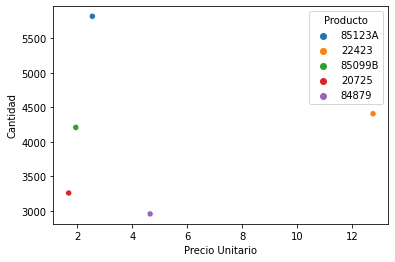

In [65]:
sns.scatterplot(data=Disp,  
                x="Precio Unitario", 
                y="Cantidad", 
                hue = "Producto", 
                sizes=(200, 1000), legend="full")

*Observamos que el producto con el costo más alto es el estante de Cupcakes de tres niveles, con un valor de 12.75 libras esterlinas. Mientras que, el valor de costo mas bajo que se precibe es el adorno en forma de pajaro con un valor de 1.69 libras esterlinas.*


**Países con mayores compras**

In [49]:
pais = pd.DataFrame(BASE['Country'].value_counts());pais

Country
United Kingdom         786639
EIRE                    14310
Germany                 13688
France                  10702
Netherlands              3772
Spain                    3011
Switzerland              2456
Belgium                  2388
Portugal                 2059
Australia                1512
Channel Islands          1373
Italy                    1288
Norway                   1092
Cyprus                   1038
Sweden                    913
Finland                   780
Austria                   717
Denmark                   583
Unspecified               581
Greece                    532
Poland                    447
Japan                     429
USA                       406
United Arab Emirates      348
Hong Kong                 306
Israel                    284
Singapore                 272
Malta                     243
Iceland                   192
Lithuania                 160
Canada                    157
RSA                       140
Bahrain                   114
Brazil                     74
Thailand                   70
Lebanon                    56
European Community         53
Korea                      50
West Indies                32
Nigeria                    25
Bermuda                    25
Czech Republic             19
Saudi Arabia                9

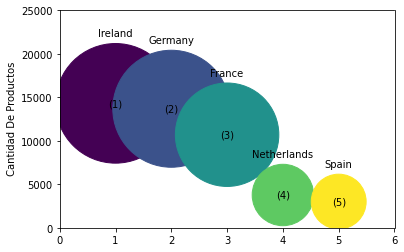

In [50]:
import matplotlib.pyplot as plt
import numpy as np

fruit_name = ["Ireland", "Germany", "France", "Netherlands", "Spain"]
fruit_count = [14310, 13688, 10702, 3772, 3011 ]
fruit_rank = [1, 2, 3, 4, 5]

#create scatter plot
fig, ax = plt.subplots()
ax.axis([0,6,0,25000])
ax.scatter(fruit_rank,fruit_count,s=fruit_count,marker='o', c=fruit_rank)

#label each bubble
for n,c,r in zip(fruit_name,fruit_count,fruit_rank):
    plt.annotate("({})".format(r),xy=(r, c), ha="center", va="center")
    plt.annotate(n ,xy=(r, c), xytext=(0,np.sqrt(c)/2.+5), 
                 textcoords="offset points", ha="center", va="bottom")

#Label axis
plt.xlabel('')
plt.ylabel(' Cantidad De Productos')
plt.show()

*La tienda registra compras en 43 países distribuidos por todo el mundo de los cuales 6 se destacan por tener el mayor número de compras, en orden descendente estos países son: Reino unido con 786639 productos, se puede decir que esta gran cantidad de productos vendidos se debe a que es el país sede de la tienda y debe ser conocido. En cuanto a los demás países se tiene Irlanda con 14310 compras, seguido por Alemania con 13688 compras, luego Francia con 10702 productos comprados, también se encuentra países bajos con 3772 compras y por último España con 3011 compras.*